In [1]:
import sys
sys.path.append("../")

from hybri import Hybrizone, HybriParams, PolarPoint, AirData, AngleMode, CoordMode, BuildMode, CurveMode, InterpolationDomain
import librosa as lb
import numpy as np
import time
import matplotlib.pyplot as plt
from matplotlib.colors import Normalize


In [2]:
# main scripts
HRIR_PATH = "/Users/pm/AcaHub/Coding/BinauralSpatial/data/HRIR-KEMAR_DATASET.h5"
RIR_PATH = "/Users/pm/AcaHub/Coding/BinauralSpatial/data/RIR-MIT_SURVEY.h5"
AUDIO_PATH = "/Users/pm/AcaHub/AudioSamples/suzanne_mono.wav"

CHUNK = 2048
SR = 44100
CHANNELS = 2

PARAMS = HybriParams(
        hrir_database_path=HRIR_PATH, 
        rir_database_path=None, 
        coord_mode=CoordMode.REGULAR, # TODO: interaural problema itd a 90 e 270 gradi
        interp_domain=InterpolationDomain.FREQUENCY,
        build_mode=BuildMode.SPHERICAL,
        chunk_size=CHUNK,
        interpolation_neighs=2
)

In [3]:

# start hybri
AURALIZER = Hybrizone(params=PARAMS)

# set air conditions
air_conditions = AirData(temperature=20, humidity=50, pressure=101325.0)
AURALIZER.imposed_air_conditions(air_data=air_conditions)

i1 = 10
i2 = 100

# AURALIZER.set_rirs(rir1=i1, rir2=i2, smooth_factor=0.1)

current_phi = 0
current_theta = 0
current_rho = 0
dstep = 0.1

hrirs = []
itds = []
# distances = [1.7, 5, 10, 25, 30, 100]
# distances = [1.7, 5, 10, 20, 30, 50]
# distances = np.linspace(0.1, 50, 30)
# distances = np.linspace(0.1, 50, 15)
# distances = np.concatenate(([1.7], distances))
# distances = [1.7, 5, 10]
distances = [0.01, 0.05, 0.1, 0.25, 0.5, 1.7]


gains_temps = []
gains_hums = []
gains_pres = []
rirs = []
kernels_2d = []


# temperatures = [-30, -10, -5, 0, 5, 10, 20, 50, 70]
# temperatures = np.linspace(-50, 120, 1024)
# humidity = np.linspace(0, 100, 1024)
# pressure = np.linspace(101325.0 / 2, 101325.0 * 5, 1024)
# for temperature in temperatures:
#     # AURALIZER = Hybrizone(params=PARAMS)
#     air_conditions = AirData(temperature=temperature, humidity=20, pressure=101325.0)
#     AURALIZER.imposed_air_conditions(air_data=air_conditions)
#     # gains.append(AURALIZER.hrir_builder.db_attenuation)
#     temp_gains = []
#     for d in distances:
#         pos = PolarPoint(rho=d, phi=0.0, theta=0.0, opt=AngleMode.DEGREE) 
#         AURALIZER.set_position(position=pos)     

#         kernels = AURALIZER.get_kernels()
#         temp_gains.append(kernels.gain)
#     gains_temps.append(temp_gains)

# for hum in humidity:
#     # AURALIZER = Hybrizone(params=PARAMS)
#     air_conditions = AirData(temperature=20, humidity=hum, pressure=101325.0)
#     AURALIZER.imposed_air_conditions(air_data=air_conditions)
#     # gains.append(AURALIZER.hrir_builder.db_attenuation)
#     temp_gains = []
#     for d in distances:
#         pos = PolarPoint(rho=d, phi=0.0, theta=0.0, opt=AngleMode.DEGREE) 
#         AURALIZER.set_position(position=pos)     

#         kernels = AURALIZER.get_kernels()
#         temp_gains.append(kernels.gain)
#     gains_hums.append(temp_gains)

# for pr in pressure:
#     # AURALIZER = Hybrizone(params=PARAMS)
#     air_conditions = AirData(temperature=20, humidity=50, pressure=pr)
#     AURALIZER.imposed_air_conditions(air_data=air_conditions)
#     # gains.append(AURALIZER.hrir_builder.db_attenuation)
#     temp_gains = []
#     for d in distances:
#         pos = PolarPoint(rho=d, phi=0.0, theta=0.0, opt=AngleMode.DEGREE) 
#         AURALIZER.set_position(position=pos)     

#         kernels = AURALIZER.get_kernels()
#         temp_gains.append(kernels.gain)
#     gains_pres.append(temp_gains)

# gains = np.array(gains)
    
    
for d in distances:
    current_theta = 0
    # kernels_temp = []
    # hrirs_temp = []
    itds_temp = []
    while True:
        pos = PolarPoint(rho=d, phi=0.0, theta=current_theta, opt=AngleMode.DEGREE) 
        AURALIZER.set_position(position=pos)

        if current_theta >= 360: 
            break

        # generates kernels (HRIR and RIR)
        kernels = AURALIZER.get_kernels()
        if kernels is not None:
            # hrirs_temp.append(kernels.hrir)
            # hrirs.append(kernels.hrir)
            # itds.append(kernels.itd)
            itds_temp.append(kernels.itd)
            # gains.append(kernels.gain)
            current_theta += dstep
            # kernels_temp.append(kernels)

        # time.sleep(1 / SR)
    # kernels_2d.append(kernels_temp)

    itds.append(itds_temp)
    # hrirs.append(hrirs_temp)
    # gains = np.array(gains)


# fab_distances = np.linspace(0.1, 50, 30)
# fab_distances = np.concatenate(([1.7], fab_distances))
# fabs_check_kernels = []
# for p in fab_distances:
#     pos = PolarPoint(rho=p, phi=0.0, theta=0.0, opt=AngleMode.DEGREE) 
#     AURALIZER.set_position(position=pos)
    
#     # AURALIZER.set_morph_data(direction=0.37, morph_curve=CurveMode.SIGMOID)
    
#     # generates kernels (HRIR and RIR)
#     kernels = AURALIZER.get_kernels()
#     fabs_check_kernels.append(kernels)


# AURALIZER.close()


(6, 3600)


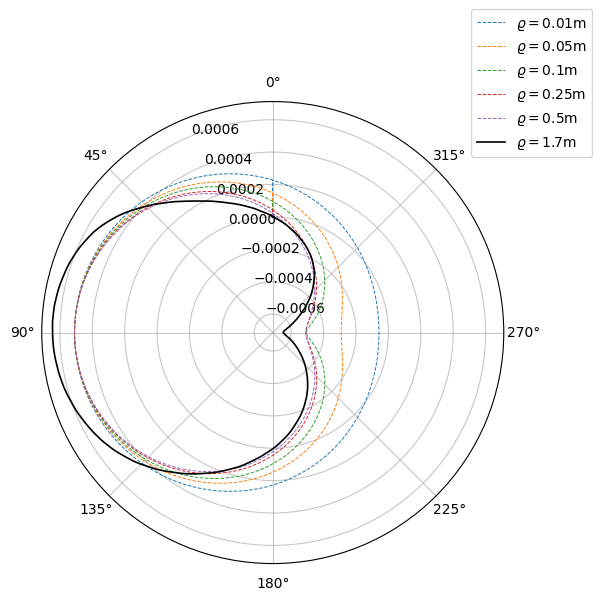

(6, 3600)

In [7]:
degree = np.linspace(0, 360, num=len(itds[0]))
degree = np.radians(degree)
itds = np.array(itds)
print(itds.shape)

fig = plt.figure(figsize=(6, 6))
ax = fig.add_subplot(111, polar=True)
 
# ax.plot(degree, itds[0], c="r", lw=0.7, label=r"$\varrho = 0.001$m")
ax.plot(degree, itds[0], lw=0.7, linestyle="--", label=r"$\varrho = 0.01$m")
ax.plot(degree, itds[1], lw=0.7, linestyle="--", label=r"$\varrho = 0.05$m")
ax.plot(degree, itds[2], lw=0.7, linestyle="--", label=r"$\varrho = 0.1$m")
ax.plot(degree, itds[3], lw=0.7, linestyle="--", label=r"$\varrho = 0.25$m")
ax.plot(degree, itds[4], lw=0.7, linestyle="--", label=r"$\varrho = 0.5$m")
ax.plot(degree, itds[5], lw=1.2, c="k", label=r"$\varrho = 1.7$m")

ax.set_theta_direction(1)  # senso orario
ax.set_theta_zero_location('N')  # 0° in alto
ax.grid(alpha=0.7)
ax.legend(loc='upper left', bbox_to_anchor=(0.93, 1.2), borderaxespad=0.)

 
plt.show()
itds.shape

(4410, 3600)


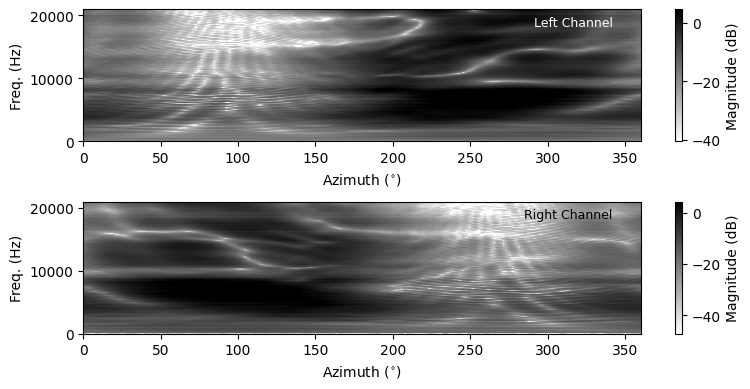

In [19]:
h = np.array(hrirs, dtype=np.float64)
left = h[:, :, 0].T
right = h[:, :, 1].T
print(left.shape)

lfft = np.fft.rfft(left, axis=0)
rfft = np.fft.rfft(right, axis=0)
lmag = lb.amplitude_to_db(np.abs(lfft))
rmag = lb.amplitude_to_db(np.abs(rfft))

langle = np.angle(lfft)
rangle = np.angle(rfft)

tt = np.linspace(0, 360, num=left.shape[1])
ff = np.fft.rfftfreq(n=left.shape[0], d=1 / SR)

fig, ax = plt.subplots(2, 1, figsize=(8, 4))

limit = 2100
norml = Normalize(vmin=np.percentile(lmag, 3), vmax=np.percentile(lmag, 97))
normr = Normalize(vmin=np.percentile(rmag, 3), vmax=np.percentile(rmag, 97))
m = ax[0].pcolormesh(tt, ff[:limit], lmag[:limit, :], cmap="gray_r", norm=norml)
ax[0].set_xlabel(r"Azimuth ($^{\circ}$)")
ax[0].set_ylabel("Freq. (Hz)")
ax[0].text(0.95, 0.95, "Left Channel", fontsize=9, ha='right', va='top', color='white', transform=ax[0].transAxes)
mm = ax[1].pcolormesh(tt, ff[:limit], rmag[:limit, :], cmap="gray_r", norm=normr)
ax[1].set_xlabel(r"Azimuth ($^{\circ}$)")
ax[1].set_ylabel("Freq. (Hz)")
ax[1].text(0.95, 0.95, "Right Channel", fontsize=9, ha='right', va='top', color='black', transform=ax[1].transAxes)
fig.colorbar(m, ax=ax[0], label="Magnitude (dB)")
fig.colorbar(mm, ax=ax[1], label="Magnitude (dB)")
plt.tight_layout()
plt.show()

In [20]:
h = np.array(hrirs)
# mag_ref = np.abs(np.fft.rfft(h[0], axis=-2))
lmag = np.abs(lfft)
rmag = np.abs(rfft)
ref_dist = 20 * np.log10(((rmag + 1e-12) / (lmag + 1e-12)) + 1e-12)
# ild = []
# ild_static = []
# for index in range(h.shape[0]):
#     mag_fft = np.abs(np.fft.rfft(h[index], axis=-2))
#     ild_temp = []
#     for angle_index in range(mag_fft.shape[0]):
#         ld = 20 * np.log10((mag_fft[angle_index, :, 1] + 1e-12) / (mag_fft[angle_index, :, 0] + 1e-12))
#         ild_temp.append(ld - ref_dist[angle_index])
#     ild.append(ild_temp)
# ild = np.array(ild)
# ild_static = np.array(ref_dist)
# avg_ild = np.mean(ild, axis=1)
# std_ild = np.std(ild, axis=1)
# avg_ild.shape, ild_static.shape
# ild_static.shape


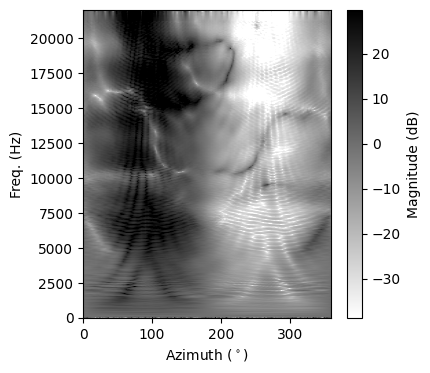

In [21]:
norm = Normalize(vmin=np.percentile(ref_dist, 3), vmax=np.percentile(ref_dist, 97))
plt.figure(figsize=(4, 4))
tt = np.linspace(0, 360, num=3600)
ff = np.fft.rfftfreq(n=4410, d=1 / SR)
plt.pcolormesh(tt, ff, ref_dist, cmap="gray_r", norm=norm)
plt.xlabel(r"Azimuth ($^\circ$)")
plt.ylabel("Freq. (Hz)")
plt.colorbar(label="Magnitude (dB)")
plt.show()

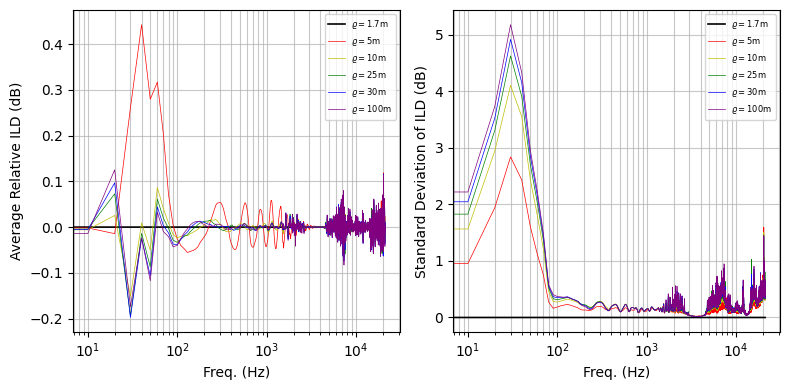

In [113]:
tt = np.linspace(0, 360, num=3600)
ff = np.fft.rfftfreq(n=4410, d=1 / SR)

colors = ["k", "r", "y", "g", "b", "purple"]


limit = 2110

fig, ax = plt.subplots(1, 2, figsize=(8, 4))


ax[0].semilogx(ff[:limit], avg_ild[0, :limit].T, c=colors[0], lw=1.2, label=r"$\varrho=$" f"{distances[0]}" r"$\mathrm{m}$")
ax[0].semilogx(ff[:limit], avg_ild[1, :limit].T, c=colors[1], lw=0.5, label=r"$\varrho=$" f"{distances[1]}" r"$\mathrm{m}$")
ax[0].semilogx(ff[:limit], avg_ild[2, :limit].T, c=colors[2], lw=0.5, label=r"$\varrho=$" f"{distances[2]}" r"$\mathrm{m}$")
ax[0].semilogx(ff[:limit], avg_ild[3, :limit].T, c=colors[3], lw=0.5, label=r"$\varrho=$" f"{distances[3]}" r"$\mathrm{m}$")
ax[0].semilogx(ff[:limit], avg_ild[4, :limit].T, c=colors[4], lw=0.5, label=r"$\varrho=$" f"{distances[4]}" r"$\mathrm{m}$")
ax[0].semilogx(ff[:limit], avg_ild[5, :limit].T, c=colors[5], lw=0.5, label=r"$\varrho=$" f"{distances[5]}" r"$\mathrm{m}$")
ax[0].set_xlabel("Freq. (Hz)")
ax[0].set_ylabel("Average Relative ILD (dB)")
ax[0].grid(True, which="both", alpha=0.7)
ax[0].legend(fontsize=6)
ax[1].semilogx(ff[:limit], std_ild[0, :limit].T, c=colors[0], lw=1.2, label=r"$\varrho=$" f"{distances[0]}" r"$\mathrm{m}$")
ax[1].semilogx(ff[:limit], std_ild[1, :limit].T, c=colors[1], lw=0.5, label=r"$\varrho=$" f"{distances[1]}" r"$\mathrm{m}$")
ax[1].semilogx(ff[:limit], std_ild[2, :limit].T, c=colors[2], lw=0.5, label=r"$\varrho=$" f"{distances[2]}" r"$\mathrm{m}$")
ax[1].semilogx(ff[:limit], std_ild[3, :limit].T, c=colors[3], lw=0.5, label=r"$\varrho=$" f"{distances[3]}" r"$\mathrm{m}$")
ax[1].semilogx(ff[:limit], std_ild[4, :limit].T, c=colors[4], lw=0.5, label=r"$\varrho=$" f"{distances[4]}" r"$\mathrm{m}$")
ax[1].semilogx(ff[:limit], std_ild[5, :limit].T, c=colors[5], lw=0.5, label=r"$\varrho=$" f"{distances[5]}" r"$\mathrm{m}$")
ax[1].set_xlabel("Freq. (Hz)")
ax[1].set_ylabel("Standard Deviation of ILD (dB)")
ax[1].grid(True, which="both", alpha=0.7)
ax[1].legend(fontsize=6)
plt.tight_layout()
plt.show()

In [41]:
gains = np.array(gains)
colors = ["k", "r", "y", "g", "b", "purple"]
f = np.linspace(0, 22050, num=gains.shape[2])
# plt.plot(f, -gains[0], lw=1, c=colors[0], label=r'$\mathrm{T} =$ 'f'{temperatures[0]}' r'$\mathrm{^\circ C}$')
# plt.plot(f, -gains[1], lw=1, c=colors[1], label=r'$\mathrm{T} =$ 'f'{temperatures[1]}' r'$\mathrm{^\circ C}$')
# plt.plot(f, -gains[2], lw=1, c=colors[2], label=r'$\mathrm{T} =$ 'f'{temperatures[2]}' r'$\mathrm{^\circ C}$')
# plt.plot(f, -gains[3], lw=2.1, c=colors[3], label=r'$\mathrm{T} =$ 'f'{temperatures[3]}' r'$\mathrm{^\circ C}$')
# plt.plot(f, -gains[4], lw=1, c=colors[4], label=r'$\mathrm{T} =$ 'f'{temperatures[4]}' r'$\mathrm{^\circ C}$')
# plt.plot(f, -gains[5], lw=1, c=colors[5], label=r'$\mathrm{T} =$ 'f'{temperatures[5]}' r'$\mathrm{^\circ C}$')
# plt.plot(f, -gains[0], lw=1, c=colors[0], label=r'$\mathrm{RH} = $' f'{humidity[0]}%')
# plt.plot(f, -gains[1], lw=1, c=colors[1], label=r'$\mathrm{RH} = $' f'{humidity[1]}%')
# plt.plot(f, -gains[2], lw=1, c=colors[2], label=r'$\mathrm{RH} = $' f'{humidity[2]}%')
# plt.plot(f, -gains[3], lw=2.1, c=colors[3], label=r'$\mathrm{RH} = $' f'{humidity[3]}%')
# plt.plot(f, -gains[4], lw=1, c=colors[4], label=r'$\mathrm{RH} = $' f'{humidity[4]}%')
# plt.plot(f, -gains[5], lw=1, c=colors[5], label=r'$\mathrm{RH} = $' f'{humidity[5]}%')
# plt.plot(f, gains[0], lw=2.1, c=colors[0], label=r'$\varrho = $ 'f'{distances[0]}' r' $\mathrm{m}$')
# plt.plot(f, gains[1], lw=1, c=colors[1], label=r'$\varrho = $ 'f'{distances[1]}' r' $\mathrm{m}$')
# plt.plot(f, gains[2], lw=1, c=colors[2], label=r'$\varrho = $ 'f'{distances[2]}' r' $\mathrm{m}$')
# plt.plot(f, gains[3], lw=1, c=colors[3], label=r'$\varrho = $ 'f'{distances[3]}' r' $\mathrm{m}$')
# plt.plot(f, gains[4], lw=1, c=colors[4], label=r'$\varrho = $ 'f'{distances[4]}' r' $\mathrm{m}$')
# plt.plot(f, gains[5], lw=1, c=colors[5], label=r'$\varrho = $ 'f'{distances[5]}' r' $\mathrm{m}$')
# plt.plot(f, gains[0, ], lw=1, c=colors[1], label=r'$\varrho = $ 'f'{distances[1]}' r' $\mathrm{m}$')
# plt.plot(f, gains[0, ], lw=1, c=colors[2], label=r'$\varrho = $ 'f'{distances[2]}' r' $\mathrm{m}$')
# plt.plot(f, gains[0, ], lw=1, c=colors[3], label=r'$\varrho = $ 'f'{distances[3]}' r' $\mathrm{m}$')
# plt.plot(f, gains[0, ], lw=1, c=colors[4], label=r'$\varrho = $ 'f'{distances[4]}' r' $\mathrm{m}$')
# plt.plot(f, gains[0, ], lw=1, c=colors[5], label=r'$\varrho = $ 'f'{distances[5]}' r' $\mathrm{m}$')

# plt.xlabel("Freq. (Hz)")
# plt.ylabel("Gain (dB)")
# plt.legend()
# plt.grid(which='major', alpha=0.7)
# plt.minorticks_on()
# plt.grid(which='minor', linestyle=':', alpha=0.5)
# plt.show()

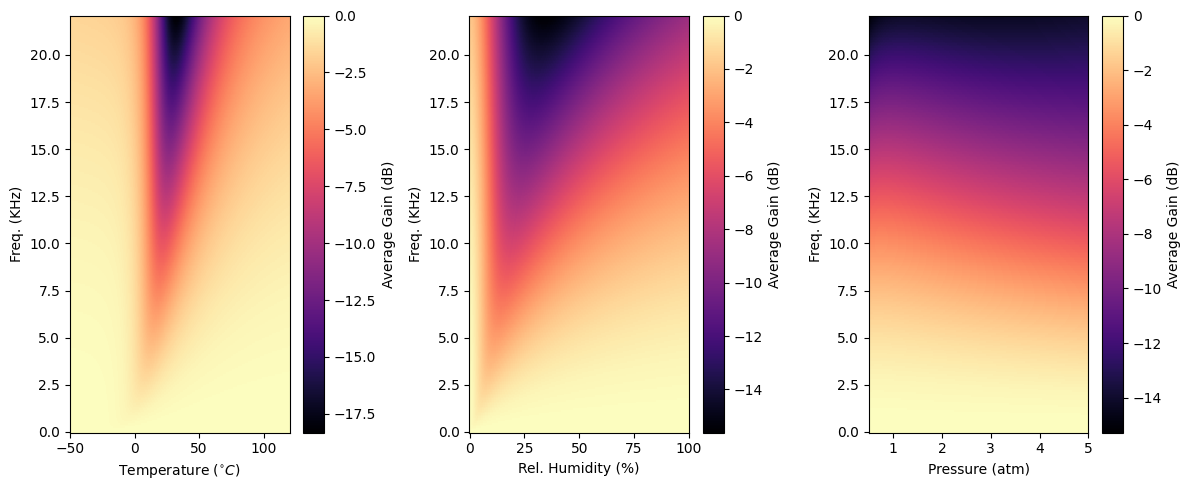

In [7]:
fig, ax = plt.subplots(1, 3, figsize=(12, 5))

gains_temps = np.array(gains_temps)
gains_hums = np.array(gains_hums)
gains_pres = np.array(gains_pres)

# Media lungo l'asse delle temperature (asse 1)
gains_temps_avg = np.mean(gains_temps, axis=1) 
gains_hums_avg = np.mean(gains_hums, axis=1) 
gains_pres_avg = np.mean(gains_pres, axis=1) 

freq_axis = np.linspace(0, SR / 2, 256) / 1000

temp_plot = ax[0].pcolormesh(temperatures, freq_axis, gains_temps_avg.T, shading="auto", cmap="magma")
ax[0].set_xlabel(r"Temperature ($^{\circ}C$)")
ax[0].set_ylabel("Freq. (KHz)")
fig.colorbar(temp_plot, ax=ax[0], label="Average Gain (dB)")

hum_plot = ax[1].pcolormesh(humidity, freq_axis, gains_hums_avg.T, shading="auto", cmap="magma")
ax[1].set_xlabel("Rel. Humidity (%)")
ax[1].set_ylabel("Freq. (KHz)")
fig.colorbar(hum_plot, ax=ax[1], label="Average Gain (dB)")

pres_plot = ax[2].pcolormesh(pressure / 101325.0, freq_axis, gains_pres_avg.T, shading="auto", cmap="magma")
ax[2].set_xlabel("Pressure (atm)")
ax[2].set_ylabel("Freq. (KHz)")
fig.colorbar(pres_plot, ax=ax[2], label="Average Gain (dB)")

plt.tight_layout()
plt.show()

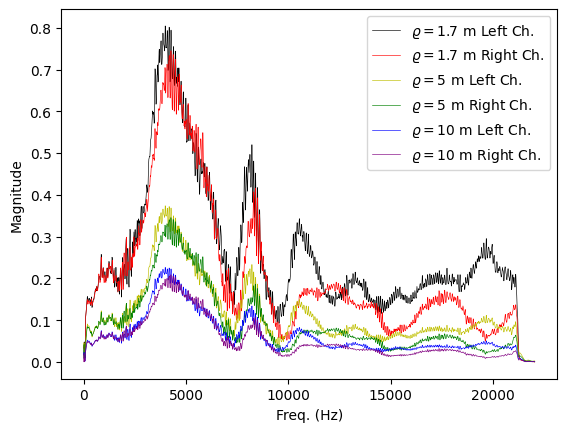

In [20]:
colors = ["k", "r", "y", "g", "b", "purple"]
freqs = np.fft.rfftfreq(n=hrirs[0].shape[0], d = 1 / 44100)
m1l = np.abs(np.fft.rfft(hrirs[0][:, 0]))
m1r = np.abs(np.fft.rfft(hrirs[0][:, 1]))
m2l = np.abs(np.fft.rfft(hrirs[1][:, 0]))
m2r = np.abs(np.fft.rfft(hrirs[1][:, 1]))
m3l = np.abs(np.fft.rfft(hrirs[2][:, 0]))
m3r = np.abs(np.fft.rfft(hrirs[2][:, 1]))
plt.plot(freqs, m1l, c=colors[0], lw=0.45, label=r'$\varrho =$' f'{distances[0]} m' ' Left Ch.')
plt.plot(freqs, m1r, c=colors[1], lw=0.45, label=r'$\varrho =$' f'{distances[0]} m' ' Right Ch.' )
plt.plot(freqs, m2l, c=colors[2], lw=0.45, label=r'$\varrho =$' f'{distances[1]} m' ' Left Ch.')
plt.plot(freqs, m2r, c=colors[3], lw=0.45, label=r'$\varrho =$' f'{distances[1]} m' ' Right Ch.')
plt.plot(freqs, m3l, c=colors[4], lw=0.45, label=r'$\varrho =$' f'{distances[2]} m' ' Left Ch.')
plt.plot(freqs, m3r, c=colors[5], lw=0.45, label=r'$\varrho =$' f'{distances[2]} m' ' Right Ch.')
plt.xlabel("Freq. (Hz)")
plt.ylabel("Magnitude")
plt.legend()
plt.show()

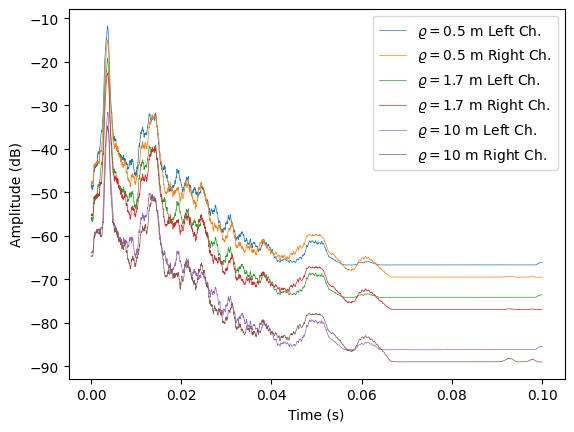

In [49]:
from scipy.ndimage import uniform_filter1d

# Finestra mobile su 5–15 campioni (dipende dalla Fs)
smooth = lambda x: uniform_filter1d(x, size=51)  # o 11, 15

t = np.arange(hrirs[0].shape[0]) / 44100

# HRIR in dB (tempo) → poi smooth
# m1l = smooth(np.abs(hrirs[0][:, 0]) * 9)
# m1r = smooth(np.abs(hrirs[0][:, 1]) * 9)
# m2l = smooth(np.abs(hrirs[1][:, 0]) * 9)
# m2r = smooth(np.abs(hrirs[1][:, 1]) * 9)
# m3l = smooth(np.abs(hrirs[4][:, 0]) * 9)
# m3r = smooth(np.abs(hrirs[4][:, 1]) * 9)
m1l = smooth(lb.amplitude_to_db(np.abs(hrirs[0][:, 0] * 9)))
m1r = smooth(lb.amplitude_to_db(np.abs(hrirs[0][:, 1] * 9)))
m2l = smooth(lb.amplitude_to_db(np.abs(hrirs[1][:, 0] * 9)))
m2r = smooth(lb.amplitude_to_db(np.abs(hrirs[1][:, 1] * 9)))
m3l = smooth(lb.amplitude_to_db(np.abs(hrirs[4][:, 0] * 9)))
m3r = smooth(lb.amplitude_to_db(np.abs(hrirs[4][:, 1] * 9)))
plt.plot(t, m1l, lw=0.5, label=r'$\varrho =$' f'{distances[0]} m' ' Left Ch.')
plt.plot(t, m1r, lw=0.5, label=r'$\varrho =$' f'{distances[0]} m' ' Right Ch.' )
plt.plot(t, m2l, lw=0.5, label=r'$\varrho =$' f'{distances[1]} m' ' Left Ch.')
plt.plot(t, m2r, lw=0.5, label=r'$\varrho =$' f'{distances[1]} m' ' Right Ch.')
plt.plot(t, m3l, lw=0.5, label=r'$\varrho =$' f'{distances[4]} m' ' Left Ch.')
plt.plot(t, m3r, lw=0.5, label=r'$\varrho =$' f'{distances[4]} m' ' Right Ch.')
plt.xlabel("Time (s)")
plt.ylabel("Amplitude (dB)")
plt.legend()
plt.show()

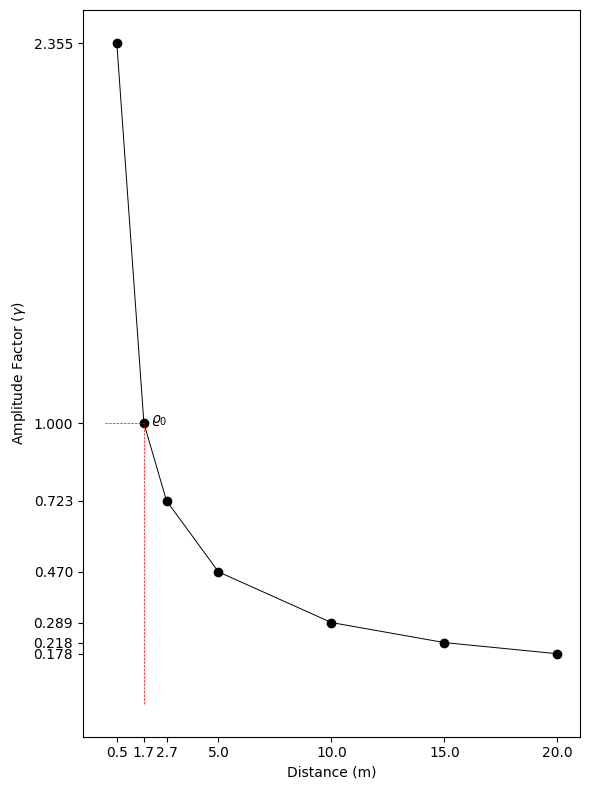

In [59]:
plt.figure(figsize=(6, 8))
att = np.array([2.35524039811009, 1.0, 0.7233685285168755, 0.4699322409041364, 0.28927722651989246, 0.21779623284513275, 0.17807102066893873])
# att = lb.amplitude_to_db(att)
plt.plot(distances, att, c="k", marker="o", lw=0.7)
plt.vlines(1.7, ymin=0.0, ymax=1.0, color="r", lw=0.5, linestyles="--")
plt.hlines(1.0, xmin=0.0, xmax=1.7, color="r", lw=0.5, linestyles="--")
plt.text(2.0, 1.0, r'$\varrho_0$')
plt.xticks(distances)
plt.yticks(att)
plt.xlabel("Distance (m)")
plt.ylabel(r"Amplitude Factor ($\gamma$)")
plt.tight_layout()
plt.show()

h183_BackPorchOfSuburbanHome_1txts h260_Classroom_1txts


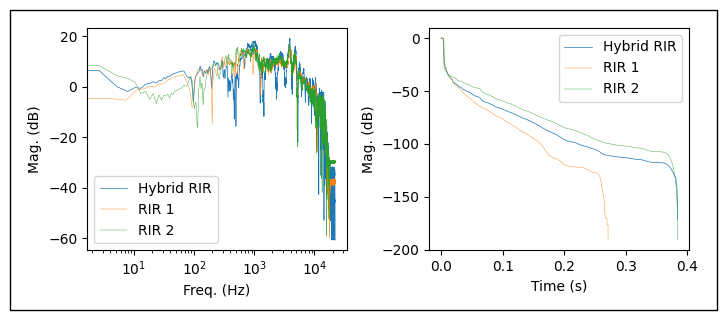

In [4]:
from matplotlib.patches import Rectangle


rir = kernels.rir
tx = np.arange(len(rir)) / SR
data = AURALIZER.get_rir_data(rir=rir)

r1 = AURALIZER.get_rir_key(rir_index=i1)
r2 = AURALIZER.get_rir_key(rir_index=i2)

r1d = AURALIZER.get_rir_data(rir=AURALIZER.get_rir(key=r1))
r2d = AURALIZER.get_rir_data(rir=AURALIZER.get_rir(key=r2))
tx1 = np.arange(len(r1d.rir)) / SR
tx2 = np.arange(len(r2d.rir)) / SR

print(r1, r2)

fig, ax = plt.subplots(1, 2, figsize=(7, 3))

ax[0].semilogx(data.freqs, lb.amplitude_to_db(data.power_spectrum), lw=0.5, label="Hybrid RIR")
ax[0].semilogx(r1d.freqs, lb.amplitude_to_db(r1d.power_spectrum), lw=0.3, label="RIR 1")
ax[0].semilogx(r2d.freqs, lb.amplitude_to_db(r2d.power_spectrum), lw=0.3, label="RIR 2")
ax[0].set_xlabel("Freq. (Hz)")
ax[0].set_ylabel("Mag. (dB)")
ax[0].legend()
ax[1].plot(tx, data.integr, lw=0.5, label="Hybrid RIR")
ax[1].plot(tx1, r1d.integr, lw=0.3, label="RIR 1")
ax[1].plot(tx2, r2d.integr, lw=0.3, label="RIR 2")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Mag. (dB)")
ax[1].legend()

rect = Rectangle((-0.005, 0.01), 1.01, 1, transform=fig.transFigure, fill=False, color='black', linewidth=1)
fig.patches.append(rect)


plt.tight_layout()
plt.show()

In [146]:
AUDIO_PATH = "/Users/pm/AcaHub/AudioSamples/suzanne_mono.wav"
HRIR_PATH = "/Users/pm/AcaHub/Coding/BinauralSpatial/data/HRIR-KEMAR_DATASET.h5"
RIR_PATH = "/Users/pm/AcaHub/Coding/BinauralSpatial/data/RIR-MIT_SURVEY.h5"

SR = 44100
CHUNK = 2048
CHANNELS = 2

PARAMS = HybriParams(
        hrir_database_path=HRIR_PATH, 
        rir_database_path=RIR_PATH, 
        coord_mode=CoordMode.REGULAR, 
        interp_domain=InterpolationDomain.FREQUENCY,
        build_mode=BuildMode.SPHERICAL,
        chunk_size=CHUNK,
        interpolation_neighs=2
)

SIG, _ = lb.load(AUDIO_PATH, sr=SR)
SIG_LIMIT = len(SIG)


# start hybri
AURALIZER = Hybrizone(params=PARAMS)

# set air conditions
air_conditions = AirData(temperature=20, humidity=0.5, pressure=101325.0)
AURALIZER.imposed_air_conditions(air_data=air_conditions)

# pass the rirs
AURALIZER.set_rirs(rir1=np.random.randint(0, 100), rir2=np.random.randint(0, 190), smooth_factor=0.1)

audio = np.zeros((0, 2), dtype=np.float32)

current_phi = 0
current_theta = 0
current_rho = 1.7
run = True
mark = 0
curr_time = 0
back = False
dstep = 0.5
azis = [current_theta]
distance_values = []
while True:
    
    if mark >= (SIG_LIMIT - CHUNK):

        # close hybri
        print(AURALIZER.get_proc_times())
        AURALIZER.close()
        run = False
        break
    
    end = min(mark + CHUNK, SIG_LIMIT - 1)
    frame = SIG[mark:end]
    
    # pass current position
    curr_ele = ((current_phi + 90) % 180)  - 90
    curr_azi = current_theta % 360
    
    if current_rho >= 30:
        back = True
    if current_rho <= 1:
        back = False
    
    if curr_time % 1 == 0:
        if back:
            current_rho -= dstep
        else:
            current_rho += dstep
    
    
            
    tstart = time.perf_counter()
    pos = PolarPoint(rho=current_rho, phi=0.0, theta=curr_azi, opt=AngleMode.DEGREE) 
    AURALIZER.set_position(position=pos)
    
    if curr_time % 5 == 0:
        current_phi += 5
        current_theta += 10
        # print(curr_ele, curr_azi, curr_rho)
    
    # pass current hybrid space params
    AURALIZER.set_morph_data(direction=0.37, morph_curve=CurveMode.SIGMOID)

    # generates kernels (HRIR and RIR)
    kernels = AURALIZER.get_kernels()
    if kernels is not None:
        azis.append(curr_azi)
        # auralization
        convolved_frame = AURALIZER.process_frame(frame=frame, kernels=kernels)
        tend = time.perf_counter()
        # print(f"[INFO] Elapsed time: {tend - tstart}")
        audio = np.concatenate((audio, convolved_frame), axis=0)
        distance_values.append(current_rho)
        mark += CHUNK
        curr_time += 1


    # time.sleep(1 / SR)

{'htime': 0.001759618805433015, 'rtime': 0.0019299527970658458, 'ptime': 0.011101341782550869}
[INFO] Close Hybrizone...
[INFO] Free memory
[INFO] Hybrizone closed!


(987136, 2)


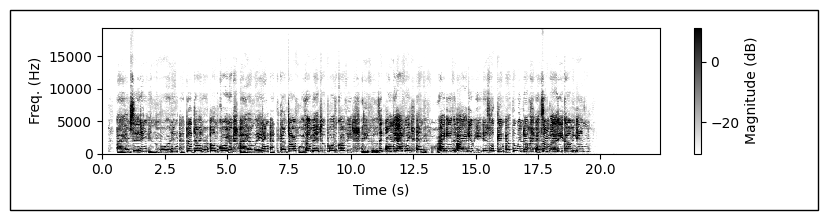

In [11]:
from matplotlib.patches import Rectangle

print(audio.shape)

left = audio[:, 0]
right = audio[:, 1]
lfft = lb.stft(left, n_fft=4096, hop_length=1024)
rfft = lb.stft(right, n_fft=4096, hop_length=1024)
magleft = lb.amplitude_to_db(np.abs(lfft))
magright = lb.amplitude_to_db(np.abs(rfft))


f = np.fft.rfftfreq(n=4096, d=1 / SR)
f[f <= 0] = 1e-6
t = np.arange(magleft.shape[1]) * (1024 / SR)

mag_total = (magleft + magright) / 2.0

fig, ax = plt.subplots(1, 1, figsize=(8, 2))

limit = 1800

# norml = Normalize(vmin=np.percentile(magleft, 3), vmax=np.percentile(magleft, 99))
# m1 = ax[0].pcolormesh(t[:], f[:limit], magleft[:limit, :], cmap="gray_r", shading="auto", label="Left Channel", norm=norml)
# ax[0].set_xlabel("Time (s)")
# ax[0].set_ylabel("Freq. (Hz)")
# ax[0].text(0.95, 0.95, "Left Channel", transform=ax[0].transAxes, fontsize=7, ha='right', va='top', color='white')
# normr = Normalize(vmin=np.percentile(magright, 3), vmax=np.percentile(magright, 99))
# m2 = ax[1].pcolormesh(t[:], f[:limit], magright[:limit, :], cmap="gray_r", shading="auto", label="Right Channel", norm=normr)
# ax[1].set_xlabel("Time (s)")
# ax[1].set_ylabel("Freq. (Hz)")
# ax[1].text(0.95, 0.95, "Right Channel", transform=ax[1].transAxes, fontsize=7, ha='right', va='top', color='white')
norm = Normalize(vmin=np.percentile(mag_total, 3), vmax=np.percentile(mag_total, 99))
m3 = ax.pcolormesh(t[:], f[:limit], mag_total[:limit, :], cmap="gray_r", shading="auto", label="Right Channel", norm=norm)
ax.set_xlabel("Time (s)")
ax.set_ylabel("Freq. (Hz)")
ax.text(0.95, 0.95, "Left + Right Channel", transform=ax.transAxes, fontsize=7, ha='right', va='top', color='white')

# fig.colorbar(m1, ax=ax[0], label="Magnitude (dB)")
# fig.colorbar(m2, ax=ax[1], label="Magnitude (dB)")
fig.colorbar(m3, ax=ax, label="Magnitude (dB)")

rect = Rectangle((-0.005, 0.01), 1.01, 1, transform=fig.transFigure, fill=False, color='black', linewidth=1)
fig.patches.append(rect)

plt.tight_layout()
plt.show()


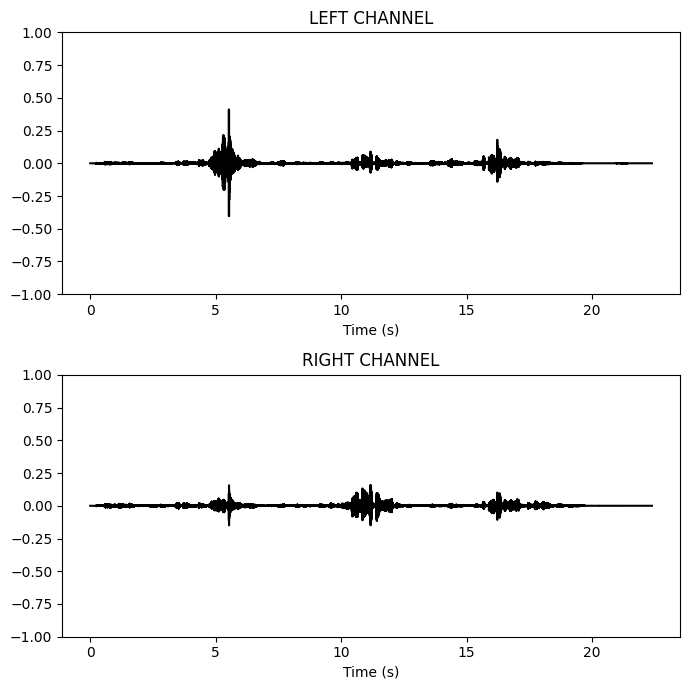

In [147]:
fig, ax = plt.subplots(2, 1, figsize=(7, 7))

LEFT_CHANNEL = audio[:, 0]
RIGHT_CHANNEL = audio[:, 1]
MID = (LEFT_CHANNEL + RIGHT_CHANNEL) / 2
SIDE = (LEFT_CHANNEL - RIGHT_CHANNEL) / 2

time_x = np.arange(len(LEFT_CHANNEL)) / SR

ax[0].plot(time_x, LEFT_CHANNEL, c="k")
ax[0].set_ylim((-1, 1))
ax[0].set_xlabel("Time (s)")
ax[0].set_title("LEFT CHANNEL")

ax[1].plot(time_x, RIGHT_CHANNEL, c="k")
ax[1].set_ylim((-1, 1))
ax[1].set_xlabel("Time (s)")
ax[1].set_title("RIGHT CHANNEL")

plt.tight_layout()
plt.show()


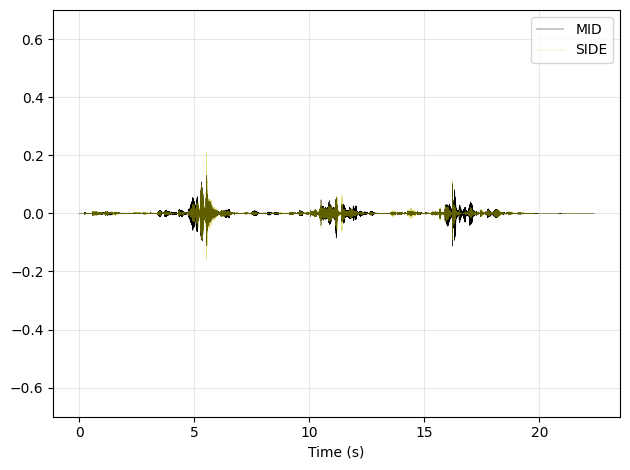

In [137]:
plt.plot(time_x, MID, c="k", lw=0.3, label="MID")
plt.plot(time_x, SIDE, c="y", lw=0.3, alpha=0.5, label="SIDE")
plt.ylim((-0.7, 0.7))
plt.xlabel("Time (s)")

plt.tight_layout()
plt.legend()
plt.grid(alpha=0.3)
plt.show()

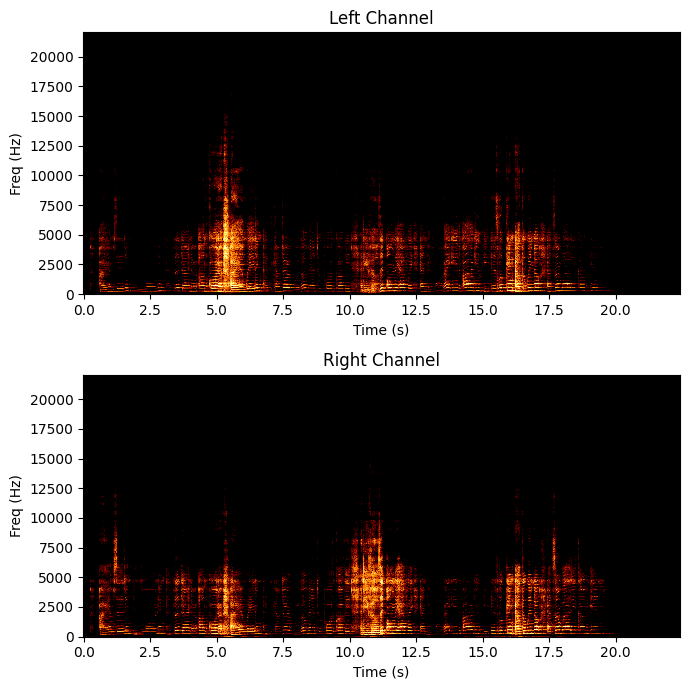

In [144]:
import scipy.signal as ss

FL, TL, LEFT_FFT = ss.stft(LEFT_CHANNEL, fs=SR, nperseg=2048, noverlap=512)
FR, TR, RIGHT_FFT = ss.stft(RIGHT_CHANNEL, fs=SR, nperseg=2048, noverlap=512)



fig, ax = plt.subplots(2, 1, figsize=(7, 7))

cmap = "afmhot"
ax[0].pcolormesh(TL, FL, lb.amplitude_to_db(np.abs(LEFT_FFT)), cmap=cmap)
ax[0].set_xlabel("Time (s)")
ax[0].set_ylabel("Freq (Hz)")
ax[0].set_title("Left Channel")
ax[1].pcolormesh(TR, FR, lb.amplitude_to_db(np.abs(RIGHT_FFT)), cmap=cmap)
ax[1].set_title("Right Channel")
ax[1].set_xlabel("Time (s)")
ax[1].set_ylabel("Freq (Hz)")

plt.tight_layout()
plt.show()


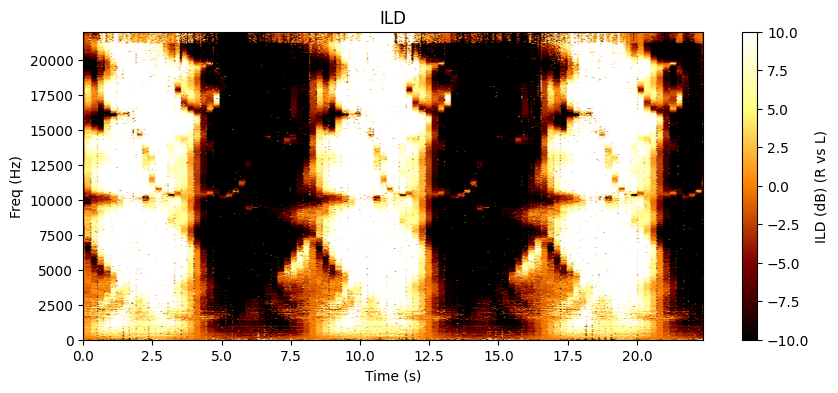

In [145]:

ILD = 20 * np.log10((np.abs(RIGHT_FFT) + 1e-12) / (np.abs(LEFT_FFT) + 1e-12))

plt.figure(figsize=(10,4))
plt.pcolormesh(TL, FL, ILD, shading='gouraud', cmap=cmap, vmin=-10, vmax=10)
plt.colorbar(label="ILD (dB) (R vs L)")
plt.ylabel("Freq (Hz)")
plt.xlabel("Time (s)")
plt.title("ILD")
plt.show()

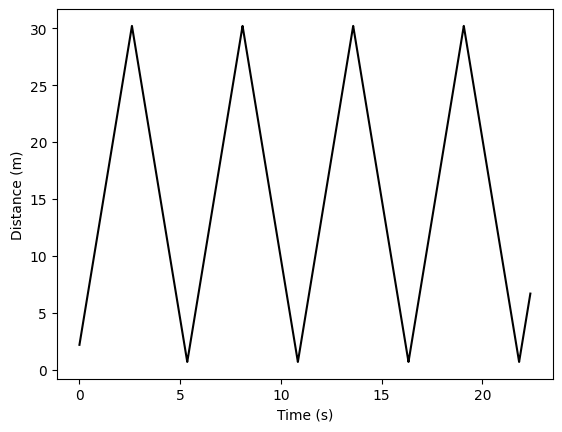

In [160]:
from scipy.interpolate import interp1d

interpolator = interp1d(np.arange(len(distance_values)), distance_values, bounds_error=None, kind="linear")
ynew = interpolator(np.linspace(0, len(distance_values) - 1, len(LEFT_CHANNEL)))

plt.plot(np.arange(len(LEFT_CHANNEL)) / SR, ynew, c="k")
plt.xlabel("Time (s)")
plt.ylabel("Distance (m)")

plt.show()

In [ ]:

a1 = np.array(
    [
        [5.449678288012774e-05, 0.0004985064036729941, 0.008995278369217237], 
        [0.0019067424052061348, 0.0023065678713607984, 0.00816985214872413], 
        [0.00035295151458478554, 0.0012488519321205423, 0.007783576859379145], 
        [0.0018556779313169218, 0.0039848253975948225, 0.012634589174120275], 
        [0.0020784100982327762, 0.0006777974244257277, 0.006269549268373051]
    ]
)

b1 = np.mean(a1, axis=0)
b1


array([0.00124966, 0.00174331, 0.00877057])

In [3]:
10 * -10 ** (0 / 20)

-10.0

In [5]:
from hrir_builder import HrirHDFData

hdf = HrirHDFData(dataset_path="/Users/pm/AcaHub/Coding/BinauralSpatial/data/HRIR-KEMAR_DATASET.h5", coord_mode=CoordMode.REGULAR)
hdf.get_polar_reference(index=10), hdf.get_cartesian_reference(index=10), hdf.get_shape()

(array([116, -10], dtype=int16),
 array([ 0.88513935, -0.4317113 , -0.17364818]),
 array([4410,    2]))

In [6]:
freqs = np.fft.rfftfreq(4410, d=1 / 44100)
freqs[-1]

22050.0

In [5]:
# FAB METRIC
from scipy.interpolate import interp1d
from scipy.optimize import minimize_scalar

def get_ild(left, right):
    return 20.0 * np.log10(np.maximum(np.abs(left), 1e-12) / np.maximum(np.abs(right), 1e-12))
    
def fab_check(ref_kernel, ext_kernel, n_fft, sr, ext_alpha, alpha_nfreqs, d0, distance, bounds, fband):
    eps = 1e-12
    xfreq = np.linspace(0, sr / 2, alpha_nfreqs)
    
    d_hrtf = np.fft.rfft(ext_kernel, n=n_fft, axis=0) # direct_align
    d_hleft = d_hrtf[:, 0]
    d_hright = d_hrtf[:, 1]
    d0_hrtf = np.fft.rfft(ref_kernel, n=n_fft, axis=0) # direct_align
    d0_hleft = d0_hrtf[:, 0]
    d0_hright = d0_hrtf[:, 1]
    
    aligned_freqs = np.fft.rfftfreq(n=n_fft, d=1 / sr)
    fmask = (aligned_freqs > fband[0]) & (aligned_freqs < fband[1])

    d0_hleft = d0_hleft[fmask]  
    d0_hright = d0_hright[fmask]
    d_hleft = d_hleft[fmask]
    d_hright = d_hright[fmask]
    freqs_masked = aligned_freqs[fmask]
    
    d0_ild = get_ild(d0_hleft, d0_hright)
    d_ild = get_ild(d_hleft, d_hright)
    diff_ild = d_ild - d0_ild
    # print("ILD diff (mean,std) [dB]:", np.mean(diff_ild), np.std(diff_ild))
    
    interpolator = interp1d(x=xfreq, y=ext_alpha, kind="linear", bounds_error=False, fill_value="extrapolate")
    new_gain = interpolator(aligned_freqs)[fmask]

    g_left = d_hleft / (d0_hleft + eps)
    g_right = d_hright / (d0_hright + eps)
    l_meas_left = 20.0 * np.log10(np.maximum(np.abs(g_left), eps))
    l_meas_right = 20.0 * np.log10(np.maximum(np.abs(g_right), eps))
    
    perceptual_weight = np.exp(-0.5 * ((freqs_masked - 2000) / 1500) ** 2)
    perceptual_weight /= np.sum(perceptual_weight)  # Normalizza

    def l_model(d):
        return 20.0 * np.log10(d0 / d) + new_gain * (d - d0)

    def objective(d):
        lmod = l_model(d)
        err_left = l_meas_left - lmod
        err_right = l_meas_right - lmod
        level_error = np.sum(perceptual_weight * (err_left ** 2 + err_right ** 2))
        
        ild_error = np.sum(perceptual_weight * (d_ild - d0_ild) ** 2)
        
        return level_error + ild_error

    res = minimize_scalar(objective, bounds=bounds, method='bounded')
    d_hat = res.x
    # print(f"Imposed distance: {distance} m || d_hat distance: {d_hat}")
    d_hat = d_hat.real
    
    return d_hat


In [ ]:
n_fft = 4096

dis = fab_distances[1:]
estimated = []
d_errors = []
for i, fd in enumerate(fabs_check_kernels[1:]):
    estimated_distance = fab_check(
        ref_kernel=fabs_check_kernels[0].hrir, 
        ext_kernel=fd.hrir, 
        n_fft=n_fft, 
        sr=SR, 
        ext_alpha=fd.gain, 
        alpha_nfreqs=256, 
        ext_itd=fd.itd,
        distance=dis[i], 
        bounds=(0.2, 200.0),
        fband=(100, 1000)
    )
    estimated.append(estimated_distance)
    d_errors.append(estimated_distance - dis[i])


ILD diff (mean,std) [dB]: 0.009550414837118625 0.01600860024663486
Imposed distance: 0.1 m || d_hat distance: 1.6792845273991397
ILD diff (mean,std) [dB]: 0.010762741424117903 0.01843173710108978
Imposed distance: 1.8206896551724139 m || d_hat distance: 1.7958872572631988
ILD diff (mean,std) [dB]: 0.02557123328836112 0.054009300559734616
Imposed distance: 3.5413793103448277 m || d_hat distance: 3.4282791518123528
ILD diff (mean,std) [dB]: 0.017907131039065872 0.034677177413333135
Imposed distance: 5.262068965517241 m || d_hat distance: 5.141608647138758
ILD diff (mean,std) [dB]: 0.015221509825396726 0.028231377276150434
Imposed distance: 6.982758620689655 m || d_hat distance: 6.839233881103603
ILD diff (mean,std) [dB]: 0.013864384432937778 0.025062592187909908
Imposed distance: 8.703448275862069 m || d_hat distance: 8.526678664428928
ILD diff (mean,std) [dB]: 0.013048700975777983 0.02319384546324749
Imposed distance: 10.424137931034481 m || d_hat distance: 10.203294700795901
ILD diff (

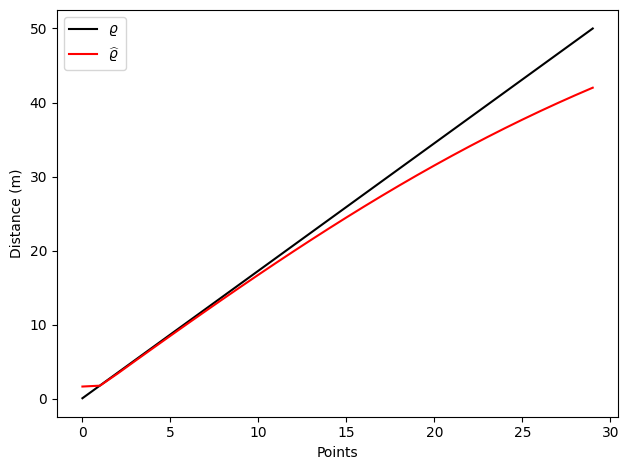

In [274]:
rel = np.abs(estimated - fab_distances[1:])

plt.plot(fab_distances[1:], c="k", label=r"$\varrho$")
plt.plot(estimated, c="r", label=r"$\widehat{\varrho}$")
plt.xlabel("Points")
plt.ylabel("Distance (m)")
plt.legend()

plt.tight_layout()
plt.show()

In [6]:
import numpy as np

def fab_distance(h_ref, h_test, sr, n_fft, bands=None):
    """
    Calcola la FAB (Frequency-dependent Azimuth Blur) distance tra due HRTF stereo (Nx2).
    
    Parameters:
    - h_ref: HRTF di riferimento (N, 2)
    - h_test: HRTF da testare (N, 2) 
    - sr: sample rate
    - n_fft: lunghezza FFT
    - bands: lista di tuple (f_low, f_high) in Hz per le bande di frequenza
    
    Returns:
    - fab_distance: valore FAB in dB
    """
    
    eps = 1e-12
    href_amp = np.mean(np.sum(h_ref ** 2, axis=1))
    htest_amp = np.mean(np.sum(h_test ** 2, axis=1))
    hdb_ref = 10 * np.log10(href_amp + eps)
    hdb_test = 10 * np.log10(htest_amp + eps)
    
    ampdb_diff = hdb_ref - hdb_test
    
    if bands is None:
        # Bande di frequenza standard per FAB
        bands = [(100, 200), (200, 400), (400, 800),
                 (800, 1600), (1600, 3200), (3200, 6400),
                 (6400, 12800), (12800, sr // 2)]
    
    # Frequenze della FFT
    freqs = np.fft.rfftfreq(n_fft, 1/sr)
    
    win = np.hanning(4410)[:, None]
    
    max_ref = np.max(np.abs(h_ref))
    max_ext = np.max(np.abs(h_test))
    if max_ref > eps:
        hr = h_ref / max_ref
    if max_ext > eps:
        ht = h_test / max_ext
    
    # FFT delle HRTF
    H_ref = np.fft.rfft(hr * win, n=n_fft, axis=0)
    H_test = np.fft.rfft(ht * win, n=n_fft, axis=0)
    
    fab_val = 0
    total_bands = 0
    
    for (f_lo, f_hi) in bands:
        # Maschera per la banda di frequenza
        mask = (freqs >= f_lo) & (freqs < f_hi)
        
        if not np.any(mask):
            continue
            
        # Energia totale per banda (orecchio sinistro e destro)
        E_ref_L = np.sum(np.abs(H_ref[mask, 0]) ** 2)
        E_ref_R = np.sum(np.abs(H_ref[mask, 1]) ** 2)
        E_test_L = np.sum(np.abs(H_test[mask, 0]) ** 2)
        E_test_R = np.sum(np.abs(H_test[mask, 1]) ** 2)
        
        # Livelli in dB per banda
        L_ref = 10 * np.log10(np.maximum(E_ref_L, eps))
        R_ref = 10 * np.log10(np.maximum(E_ref_R, eps))
        L_test = 10 * np.log10(np.maximum(E_test_L, eps))
        R_test = 10 * np.log10(np.maximum(E_test_R, eps))
        
        # Level errors per orecchio
        lev_err_L = (L_test - L_ref) ** 2
        lev_err_R = (R_test - R_ref) ** 2
        
        # ILD (Interaural Level Difference) error
        ILD_ref = L_ref - R_ref
        ILD_test = L_test - R_test
        ild_err = (ILD_test - ILD_ref) ** 2
        
        # Peso percettivo (opzionale: maggiore peso per 1-4 kHz)
        if 1000 <= f_lo < 4000:
            weight = 2.0  # Peso maggiore per le frequenze critiche
        else:
            weight = 1.0
            
        # Accumula l'errore pesato
        fab_val += weight * (lev_err_L + lev_err_R + ild_err)
        total_bands += weight
    
    # RMS finale
    if total_bands > 0:
        fab_val = np.sqrt(fab_val / total_bands)
    else:
        fab_val = float('inf')
        
    return fab_val, ampdb_diff

In [272]:
n_fft = 4096

dis = fab_distances[1:]
rmss = []
for i, fd in enumerate(fabs_check_kernels[1:]):
    rms = fab_distance(h_ref=fabs_check_kernels[0].hrir, h_test=fd.hrir, n_fft=n_fft, sr=SR)
    rmss.append(rms)

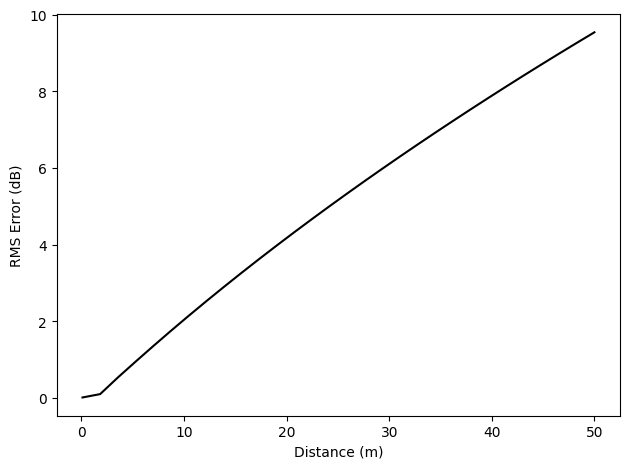

In [276]:
plt.plot(fab_distances[1:], rmss, c="k")
plt.xlabel("Distance (m)")
plt.ylabel("RMS Error (dB)")

plt.tight_layout()
plt.show()

In [7]:
kernels_2d = np.array(kernels_2d)
rms_2d = []
db_diff_2d = []
itd_2d = []
db_att_2d = []

for i in range(1, len(distances)):
    temp_rms = []
    temp_db = []
    temp_itd = []
    kref = kernels_2d[i]
    for j, k in enumerate(kref):
        rms, db_diff = fab_distance(h_ref=kernels_2d[0, j].hrir, h_test=k.hrir, n_fft=4096, sr=SR)
        temp_rms.append(rms)
        temp_db.append(db_diff)
        temp_itd.append(abs(kernels_2d[0, j].itd - k.itd))
    rms_2d.append(temp_rms)
    db_diff_2d.append(temp_db)
    itd_2d.append(temp_itd)
    db_att_2d.append(20 * np.log10(distances[i] / distances[0]))
rms_2d = np.array(rms_2d)
db_diff_2d = np.array(db_diff_2d)
itd_2d = np.array(itd_2d)
db_diff_2d.shape

(30, 360)

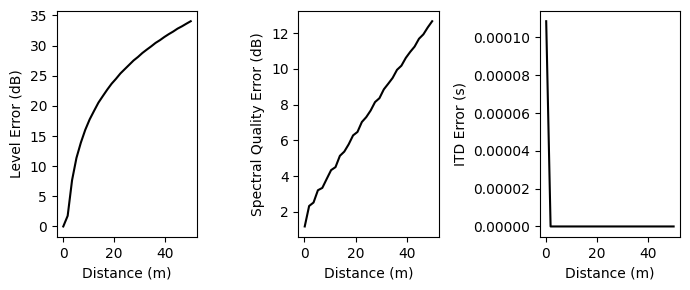

In [149]:
fig, ax = plt.subplots(1, 3, figsize=(7, 3))


ax[0].plot(distances[1:], np.mean(db_diff_2d, axis=1), c="k")
ax[0].set_xlabel("Distance (m)")
ax[0].set_ylabel("Level Error (dB)")
ax[1].plot(distances[1:], np.mean(rms_2d, axis=1), c="k")
ax[1].set_xlabel("Distance (m)")
ax[1].set_ylabel("Spectral Quality Error (dB)")
ax[2].plot(distances[1:], np.mean(itd_2d, axis=1), c="k")
ax[2].set_xlabel("Distance (m)")
ax[2].set_ylabel("ITD Error (s)")

plt.tight_layout()
plt.show()

In [8]:
n_fft = 4096

estimated2d = []
d_errors2d = []
for i in range(1, len(distances)):
    temp_est = []
    temp_err = []
    kref = kernels_2d[i]
    for j, k in enumerate(kref):
        estimated_distance = fab_check(
            ref_kernel=kernels_2d[0, j].hrir, 
            ext_kernel=k.hrir, 
            n_fft=n_fft, 
            sr=SR, 
            ext_alpha=k.gain, 
            alpha_nfreqs=256, 
            d0=distances[0],
            distance=distances[i], 
            bounds=(0.2, 200.0),
            fband=(100, 1000)
        )
        temp_est.append(estimated_distance)
        temp_err.append(estimated_distance - distances[i])
    estimated2d.append(temp_est)
    d_errors2d.append(temp_err)
        

In [74]:
estimated2d = np.array(estimated2d)
d_errors2d = np.array(d_errors2d)

d_errors2d

array([[ 1.57928453e+00,  1.60000035e+00,  1.60000035e+00, ...,
         1.59999959e+00,  1.59999961e+00,  1.60000164e+00],
       [-2.48023979e-02,  1.55325150e-04,  2.25745405e-04, ...,
         1.87718920e-03,  1.86348663e-03,  1.85428277e-03],
       [-1.03320131e-01,  3.02710182e-03,  2.98187975e-03, ...,
         1.86654369e-03,  1.95223104e-03,  2.02759912e-03],
       ...,
       [-6.25884216e+00, -6.23973974e+00, -6.23920793e+00, ...,
        -6.21500493e+00, -6.21543617e+00, -6.21638860e+00],
       [-6.88885686e+00, -6.87536756e+00, -6.87370616e+00, ...,
        -6.90417928e+00, -6.90340920e+00, -6.90338058e+00],
       [-7.60364729e+00, -7.59524121e+00, -7.59217239e+00, ...,
        -7.56936893e+00, -7.57056965e+00, -7.57307793e+00]])

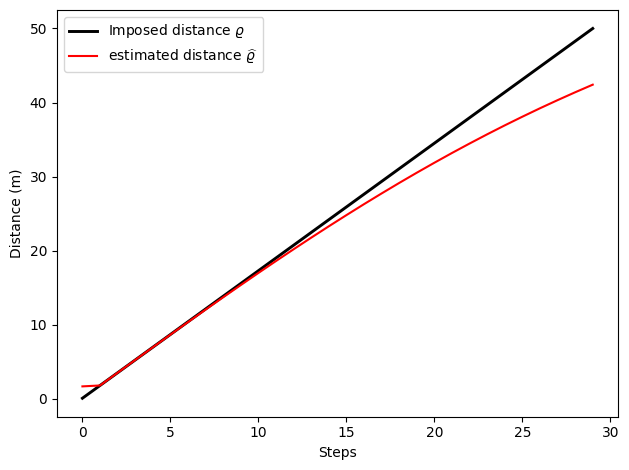

In [150]:
plt.plot(distances[1:], lw=2.1, c="k", label=r"Imposed distance $\varrho$")
plt.plot(np.mean(estimated2d, axis=1), c="r", label=r"estimated distance $\widehat{\varrho}$")
plt.xlabel("Steps")
plt.ylabel("Distance (m)")
plt.legend()

plt.tight_layout()
plt.show()

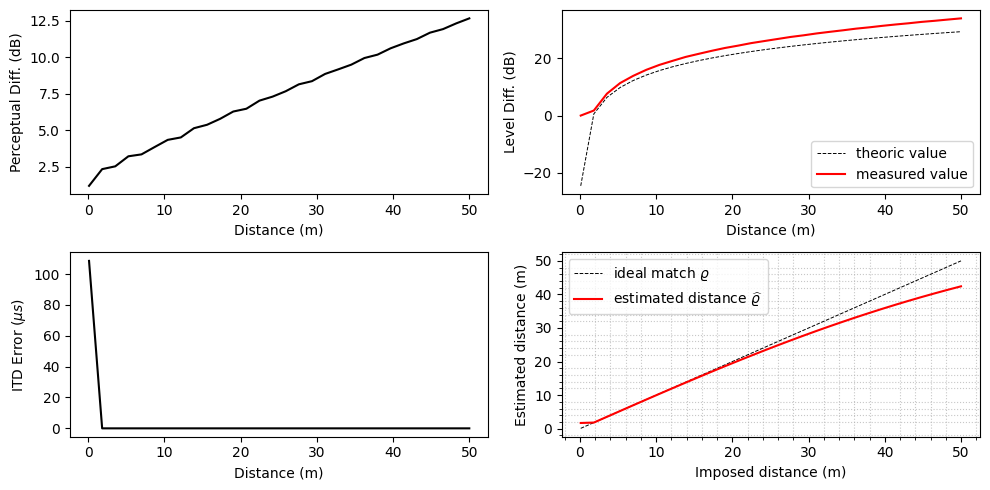

In [ ]:
fig, ax = plt.subplots(2, 2, figsize=(10, 5))


ax[0, 0].plot(distances[1:], np.mean(rms_2d, axis=1), c="k")
ax[0, 0].set_xlabel("Distance (m)")
ax[0, 0].set_ylabel("Perceptual Diff. (dB)")
ax[0, 0].minorticks_on
ax[0, 0].grid(which='minor', linestyle=':', alpha=0.5)
ax[0, 1].plot(distances[1:], db_att_2d, c="k", linestyle="--", lw=0.7, label="theoric value")
ax[0, 1].plot(distances[1:], np.mean(db_diff_2d, axis=1), c="r", label="measured value")
ax[0, 1].set_xlabel("Distance (m)")
ax[0, 1].set_ylabel("Level Diff. (dB)")
ax[0, 1].legend()
ax[0, 1].minorticks_on()
ax[0, 1].grid(which='minor', linestyle=':', alpha=0.5)
ax[1, 0].plot(distances[1:], np.mean(itd_2d, axis=1) * 1000000.0, c="k")
ax[1, 0].set_xlabel("Distance (m)")
ax[1, 0].set_ylabel(r"ITD Error ($\mu s$)")
ax[1, 0].minorticks_on()
ax[1, 0].grid(which='minor', linestyle=':', alpha=0.5)
ax[1, 1].plot(distances[1:], distances[1:], lw=0.7, linestyle="--", c="k", label=r"ideal match $\varrho$")
ax[1, 1].plot(distances[1:], np.mean(estimated2d, axis=1), c="r", label=r"estimated distance $\widehat{\varrho}$")
ax[1, 1].set_xlabel("Imposed distance (m)")
ax[1, 1].set_ylabel("Estimated distance (m)")
ax[1, 1].minorticks_on()
ax[1, 1].grid(which='minor', linestyle=':', alpha=0.7)
ax[1, 1].legend()


plt.tight_layout()
plt.show()

In [10]:
distances

array([ 1.7       ,  0.1       ,  1.82068966,  3.54137931,  5.26206897,
        6.98275862,  8.70344828, 10.42413793, 12.14482759, 13.86551724,
       15.5862069 , 17.30689655, 19.02758621, 20.74827586, 22.46896552,
       24.18965517, 25.91034483, 27.63103448, 29.35172414, 31.07241379,
       32.79310345, 34.5137931 , 36.23448276, 37.95517241, 39.67586207,
       41.39655172, 43.11724138, 44.83793103, 46.55862069, 48.27931034,
       50.        ])

In [22]:
slice = [0, 1, 2, 4, 6, 8, 10, 12, 14, 16, 18, 23, 25, 27, 29]
# print(distances[1:][slice])
# np.mean(rms_2d, axis=1)[slice]
# (np.mean(itd_2d, axis=1) * 1000000.0)[slice]
np.mean(estimated2d, axis=1)[slice]
# np.mean(db_diff_2d, axis=1)[slice]

array([ 1.69996647,  1.82191188,  3.54299106,  6.97440611, 10.37498198,
       13.72531043, 17.00669952, 20.20369797, 23.3022694 , 26.28925209,
       29.15143231, 35.71697558, 38.09350808, 40.32669883, 42.41758972])

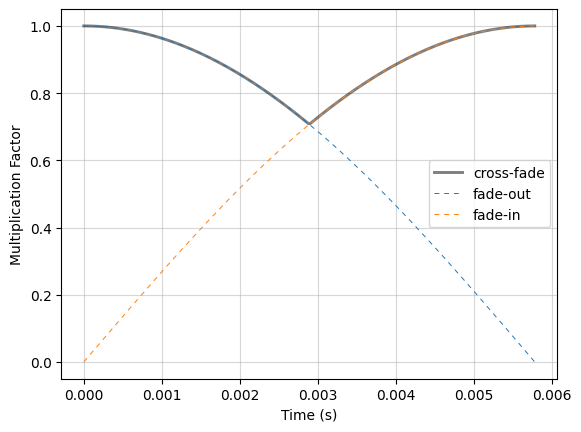

In [3]:
size_cross = 256
time_line = np.arange(size_cross)
cos_part = np.cos(np.pi / 2 * time_line / (size_cross - 1))
sin_part = np.sin(np.pi / 2 * time_line / (size_cross - 1))
cross_fade = np.concatenate((cos_part[:size_cross // 2], sin_part[size_cross // 2:]))

plt.plot(time_line / 44100, cross_fade, lw=2.1, c="k", alpha=0.5, label="cross-fade")
plt.plot(time_line / 44100, cos_part, linestyle=(0, (5, 5)), lw=0.7, label="fade-out")
plt.plot(time_line / 44100, sin_part, linestyle=(0, (5, 5)), lw=0.7, label="fade-in")
plt.ylabel("Multiplication Factor")
plt.xlabel("Time (s)")
plt.legend()
plt.grid(alpha=0.5)
plt.show()


In [6]:
20 * np.log10((cos_part[size_cross // 2]))

-3.0371350013159444

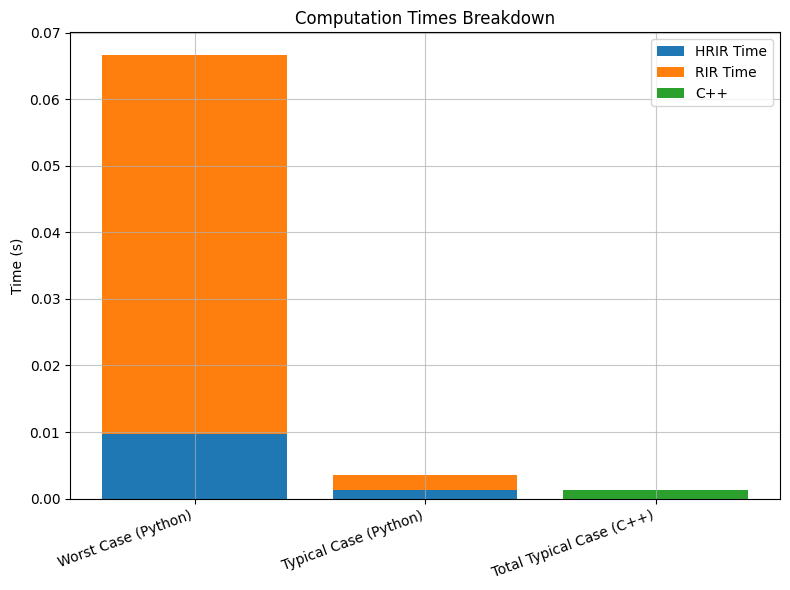

In [25]:
total_comp = [0.0604, 0.0087]
worst_hrir_time = 0.0604 - 0.0507
worst_rir_time = 0.057
better_hrir_time = 0.00124
better_rir_time = 0.0023
cplus = (0.0008 + 0.0017) / 2

# Categorie principali
labels = ["Worst Case (Python)", "Typical Case (Python)", "Total Typical Case (C++)"]

# Componenti interne
hrir_times = [worst_hrir_time, better_hrir_time, 0]
rir_times = [worst_rir_time, better_rir_time, 0]
cplot = [0, 0, cplus]

x = range(len(labels))

plt.figure(figsize=(8,6))

# Barre impilate
plt.bar(x, hrir_times, label="HRIR Time")
plt.bar(x, rir_times, bottom=hrir_times, label="RIR Time")

# Etichetta aggiuntiva per C++
plt.bar(x, cplot, label="C++")

plt.xticks(x, labels, rotation=20, ha="right")
plt.ylabel("Time (s)")
plt.title("Computation Times Breakdown")
plt.legend()

plt.tight_layout()
plt.grid(alpha=0.7)
plt.show()

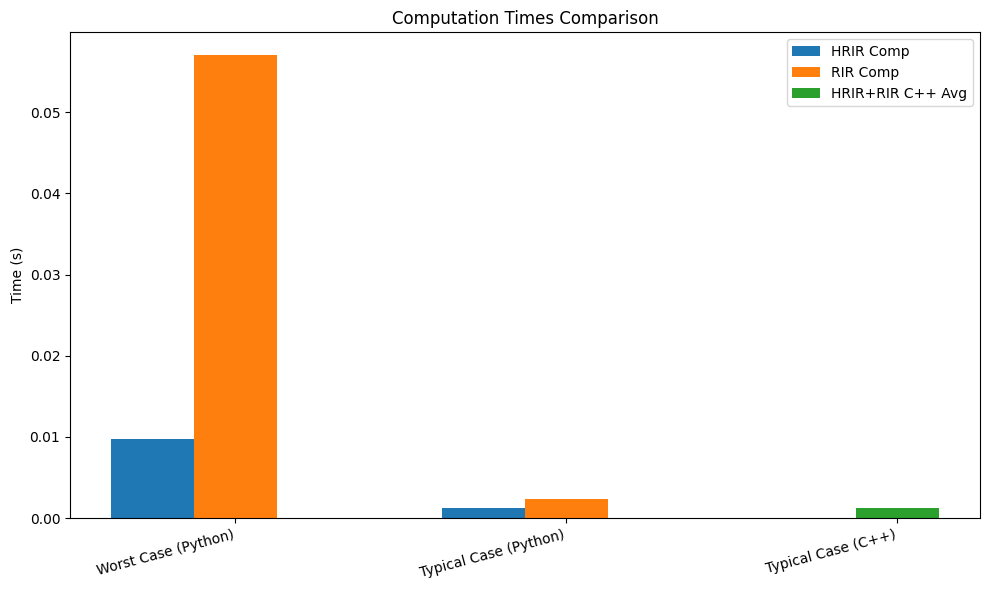

In [32]:
total_comp = [0.0604, 0.0087]
worst_hrir_time = 0.0604 - 0.0507
worst_rir_time = 0.057
better_hrir_time = 0.00124
better_rir_time = 0.0023
cplus = (0.0008 + 0.0017) / 2

# Etichette
labels = ["Worst Case (Python)", "Typical Case (Python)", "Typical Case (C++)"]

# Organizzo i dati in gruppi
hrir = [worst_hrir_time, better_hrir_time, 0]
rir = [worst_rir_time, better_rir_time, 0]
cplus_vals = [0, 0, cplus]

x = np.arange(len(labels))  # posizioni gruppi
width = 0.25  # larghezza barre

plt.figure(figsize=(10,6))

# Disegno barre affiancate con colori diversi
plt.bar(x - width, hrir, width, label="HRIR Comp", color="tab:blue")
plt.bar(x, rir, width, label="RIR Comp", color="tab:orange")
plt.bar(x, cplus_vals, width, label="HRIR+RIR C++ Avg", color="tab:green")

# Aggiungo asse logaritmico
# plt.yscale("log")

# Etichette e titolo
plt.xticks(x, labels, rotation=15, ha="right")
plt.ylabel("Time (s)")
plt.title("Computation Times Comparison")
plt.legend()

plt.tight_layout()
plt.show()

In [ ]:
(2048 * 5) / SR 

0.23219954648526078

In [162]:
10 / 0.23

43.47826086956522

In [164]:
2048 / SR

0.046439909297052155

In [165]:
0.5 / 0.046

10.869565217391305